# Competição FGV Quant e FGV Tech

## Descrição do Problema

A empresa quer desenvolver uma ferramenta de sugestão de preços de automóveis. O seu trabalho é criar um modelo preditivo usando como base os dados já disponíveis pela empresa.

## Métrica de Avaliação

Todos os modelos serão avaliados através do R2 entre o valor predito/valor estimado do modelo e o valor real dos dados do conjunto cars_test.

A pontuação R2 é o coeficiente de determinação do modelo

## Formato de Submissão

Submeta o arquivo em formato .csv somente com as colunas "id" e "selling_price", exemplo:

id,selling_price \
1,100000 \
2,1260000 \
3,900000

# Analise dos dados

## Leitura dos dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.style.use('dark_background')


In [2]:
train = pd.read_csv('data/cars_train.csv')
test = pd.read_csv('data/cars_test.csv')

In [3]:
train.head()

,id,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,0,Maruti 800 EX 5 Speed,2006,65000,120000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
1,1,Maruti Baleno Delta 1.2,2017,550000,46000,Petrol,Individual,Manual,First Owner,21.4 kmpl,1197 CC,83.1 bhp,115Nm@ 4000rpm,5.0
2,2,Toyota Innova 2.5 G (Diesel) 7 Seater BS IV,2012,730000,210000,Diesel,Individual,Manual,First Owner,12.99 kmpl,2494 CC,100 bhp,200Nm@ 1400-3400rpm,7.0
3,3,Maruti Alto LXi,2010,135000,95000,Petrol,Individual,Manual,Third Owner,19.7 kmpl,796 CC,46.3 bhp,62Nm@ 3000rpm,5.0
4,4,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5689 entries, 0 to 5688
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             5689 non-null   int64  
 1   name           5689 non-null   object 
 2   year           5689 non-null   int64  
 3   selling_price  5689 non-null   int64  
 4   km_driven      5689 non-null   int64  
 5   fuel           5689 non-null   object 
 6   seller_type    5689 non-null   object 
 7   transmission   5689 non-null   object 
 8   owner          5689 non-null   object 
 9   mileage        5533 non-null   object 
 10  engine         5533 non-null   object 
 11  max_power      5538 non-null   object 
 12  torque         5532 non-null   object 
 13  seats          5533 non-null   float64
dtypes: float64(1), int64(4), object(9)
memory usage: 622.4+ KB


In [5]:
train.describe()

,id,year,selling_price,km_driven,seats
count,5689.000000,5689.000000,5.689000e+03,5689.000000,5533.000000
mean,2844.000000,2013.875901,6.447324e+05,69030.398664,5.409904
std,1642.417172,3.996931,8.111046e+05,47952.840115,0.943672
min,0.000000,1983.000000,3.000000e+04,1000.000000,2.000000
25%,1422.000000,2011.000000,2.600000e+05,35000.000000,5.000000
50%,2844.000000,2015.000000,4.500000e+05,60000.000000,5.000000
75%,4266.000000,2017.000000,6.800000e+05,97000.000000,5.000000
max,5688.000000,2020.000000,1.000000e+07,577414.000000,10.000000


## Tratamento Inicial dos Dados

In [6]:
train.isnull().sum()

id                 0
name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          156
engine           156
max_power        151
torque           157
seats            156
dtype: int64

In [7]:
# Removendo os nulls do train
train = train.dropna()
train.isnull().sum()

id               0
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [8]:
# Transformando as colunas Mileage, Engine e Max_power em int
train['mileage'] = train.loc[:,'mileage'].str.replace(r'\D', '').astype(int)
train['engine'] = train.loc[:,'engine'].str.replace(r'\D', '').astype(int)
train['max_power'] = train.loc[:,'max_power'].str.replace(r'\D', '').astype(int)

In [9]:
train.head()

,id,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,0,Maruti 800 EX 5 Speed,2006,65000,120000,Petrol,Individual,Manual,Second Owner,161,796,37,59Nm@ 2500rpm,4.0
1,1,Maruti Baleno Delta 1.2,2017,550000,46000,Petrol,Individual,Manual,First Owner,214,1197,831,115Nm@ 4000rpm,5.0
2,2,Toyota Innova 2.5 G (Diesel) 7 Seater BS IV,2012,730000,210000,Diesel,Individual,Manual,First Owner,1299,2494,100,200Nm@ 1400-3400rpm,7.0
3,3,Maruti Alto LXi,2010,135000,95000,Petrol,Individual,Manual,Third Owner,197,796,463,62Nm@ 3000rpm,5.0
4,4,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,227,1498,8984,204Nm@ 2000-2750rpm,5.0


In [10]:
# Adicionando uma coluna para a marca do carro e outra para o modelo
train['marca'] = train.loc[:,'name'].str.split(' ').str[0]
train['model'] = train.loc[:,'name'].str.split(' ').str[0] + " " + train['name'].str.split(' ').str[1]

In [11]:
train

,id,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,marca,model
0,0,Maruti 800 EX 5 Speed,2006,65000,120000,Petrol,Individual,Manual,Second Owner,161,796,37,59Nm@ 2500rpm,4.0,Maruti,Maruti 800
1,1,Maruti Baleno Delta 1.2,2017,550000,46000,Petrol,Individual,Manual,First Owner,214,1197,831,115Nm@ 4000rpm,5.0,Maruti,Maruti Baleno
2,2,Toyota Innova 2.5 G (Diesel) 7 Seater BS IV,2012,730000,210000,Diesel,Individual,Manual,First Owner,1299,2494,100,200Nm@ 1400-3400rpm,7.0,Toyota,Toyota Innova
3,3,Maruti Alto LXi,2010,135000,95000,Petrol,Individual,Manual,Third Owner,197,796,463,62Nm@ 3000rpm,5.0,Maruti,Maruti Alto
4,4,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,227,1498,8984,204Nm@ 2000-2750rpm,5.0,Ford,Ford Ecosport
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5684,5684,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,227,1498,8984,204Nm@ 2000-2750rpm,5.0,Ford,Ford Ecosport
5685,5685,Toyota Innova 2.5 VX (Diesel) 7 Seater,2013,750000,79328,Diesel,Trustmark Dealer,Manual,Second Owner,1299,2494,1006,200Nm@ 1200-3600rpm,7.0,Toyota,Toyota Innova
5686,5686,Mahindra Scorpio S10 7 Seater,2015,1125000,70000,Diesel,Individual,Manual,First Owner,154,2179,120,280Nm@ 1800-2800rpm,7.0,Mahindra,Mahindra Scorpio
5687,5687,Maruti Ciaz RS ZDi Plus SHVS,2017,844999,70000,Diesel,Dealer,Manual,First Owner,2809,1248,885,200Nm@ 1750rpm,5.0,Maruti,Maruti Ciaz


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5532 entries, 0 to 5688
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             5532 non-null   int64  
 1   name           5532 non-null   object 
 2   year           5532 non-null   int64  
 3   selling_price  5532 non-null   int64  
 4   km_driven      5532 non-null   int64  
 5   fuel           5532 non-null   object 
 6   seller_type    5532 non-null   object 
 7   transmission   5532 non-null   object 
 8   owner          5532 non-null   object 
 9   mileage        5532 non-null   int32  
 10  engine         5532 non-null   int32  
 11  max_power      5532 non-null   int32  
 12  torque         5532 non-null   object 
 13  seats          5532 non-null   float64
 14  marca          5532 non-null   object 
 15  model          5532 non-null   object 
dtypes: float64(1), int32(3), int64(4), object(8)
memory usage: 669.9+ KB


## Matriz de Correlação

In [ ]:
from dython import nominal

In [ ]:
nominal.associations(train, figsize=(20,10),mark_columns=True);

## Análise dos dados qualitativos

In [ ]:
train.columns

In [ ]:
train_quali = train.loc[:,['fuel', 'seller_type', 'transmission', 'owner']]
train_quali

In [ ]:
for i in train_quali.columns:
    print(train_quali['%s' %(i)].value_counts())
    print('')

In [ ]:
plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
sns.boxplot(x="fuel", y="selling_price", data = train)

plt.subplot(2, 2, 2)
sns.boxplot(x="seller_type", y="selling_price", data = train)

plt.subplot(2, 2, 3)
sns.boxplot(x="transmission", y="selling_price", data = train)

plt.subplot(2, 2, 4)
sns.boxplot(x="owner", y="selling_price", data = train)

plt.show()

## Análise dos dados quantitativos

In [ ]:
train_quant = train.copy().drop(columns=['id', 'name', 'torque', 'model'])
train_quant = train_quant.drop(columns=['fuel', 'seller_type', 'transmission', 'owner', 'marca'])
train_quant

In [ ]:
fig, axs = plt.subplots(3,2, figsize=(20, 15))

sns.histplot(ax=axs[0,0], x="year", data=train)
sns.histplot(ax=axs[0,1], x='km_driven', data=train)
sns.histplot(ax=axs[1,0], x="mileage", data=train)
sns.histplot(ax=axs[1,1], x="engine", data=train)
sns.histplot(ax=axs[2,0], x="max_power", data=train)
fig.delaxes(axs[2,1])

plt.show()

In [ ]:
fig, axs = plt.subplots(3,2, figsize=(20, 15))

sns.scatterplot(ax=axs[0,0], x="year", y="selling_price", data=train)
sns.scatterplot(ax=axs[0,1], x = 'km_driven', y = 'selling_price', data=train)
sns.scatterplot(ax=axs[1,0], x="mileage", y="selling_price", data=train)
sns.scatterplot(ax=axs[1,1], x="engine", y="selling_price", data=train)
sns.scatterplot(ax=axs[2,0], x="max_power", y="selling_price", data=train)
fig.delaxes(axs[2,1])

plt.show()

In [ ]:
fig, axs = plt.subplots(3,2, figsize=(20, 15))

axs[0,0].hexbin(x="year", y="selling_price", data = train, gridsize=50, bins='log', cmap='binary')
axs[0,1].hexbin(x='km_driven', y = 'selling_price', data = train, gridsize=50, bins='log', cmap='binary')
axs[1,0].hexbin(x="mileage", y="selling_price", data = train, gridsize=50, bins='log', cmap='binary')
axs[1,1].hexbin(x="engine", y="selling_price", data = train, gridsize=50, bins='log', cmap='binary')
axs[2,0].hexbin(x="max_power", y="selling_price", data = train, gridsize=50, bins='log', cmap='binary')
fig.delaxes(axs[2,1])

plt.show()

## Tratamento da base de teste

In [13]:
test.isnull().sum()

id              0
name            0
year            0
km_driven       0
fuel            0
seller_type     0
transmission    0
owner           0
mileage         0
engine          0
max_power       0
torque          0
seats           0
dtype: int64

In [14]:
# Transformando as colunas Mileage, Engine e Max_power em int
test['mileage'] = test.loc[:,'mileage'].str.replace(r'\D', '').astype(int)
test['engine'] = test.loc[:,'engine'].str.replace(r'\D', '').astype(int)
test['max_power'] = test.loc[:,'max_power'].str.replace(r'\D', '').astype(int)

# Adicionando uma coluna para a marca do carro e outra para o modelo
test['marca'] = test.loc[:,'name'].str.split(' ').str[0]
test['model'] = test.loc[:,'name'].str.split(' ').str[0] + " " + train['name'].str.split(' ').str[1]


test = test.drop(columns = ['id','name','torque'])

In [15]:
test

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,marca,model
0,2018,25000,Petrol,Individual,Manual,First Owner,2121,1197,8180,5.0,Maruti,Maruti 800
1,2017,43000,Diesel,Dealer,Manual,First Owner,2254,1396,8873,5.0,Hyundai,Hyundai Baleno
2,2014,15000,Petrol,Individual,Manual,Second Owner,2274,796,473,5.0,Maruti,Maruti Innova
3,2017,60000,Diesel,Dealer,Automatic,Second Owner,1255,2982,1685,7.0,Toyota,Toyota Alto
4,2019,7032,Petrol,Trustmark Dealer,Automatic,First Owner,190,1199,8876,5.0,Honda,Honda Ecosport
...,...,...,...,...,...,...,...,...,...,...,...,...
2369,2015,53000,Petrol,Individual,Manual,Second Owner,2274,796,473,5.0,Maruti,Maruti Bolero
2370,2016,56494,Petrol,Trustmark Dealer,Manual,First Owner,182,1199,887,5.0,Honda,Honda Baleno
2371,2015,110000,Diesel,Individual,Manual,First Owner,2659,1248,74,5.0,Maruti,Maruti Alto
2372,2010,110000,Diesel,Individual,Manual,Second Owner,200,1399,68,5.0,Ford,Ford Xcent


----

## Modelagem

### Linear regression

In [16]:
train.columns, test.columns

(Index(['id', 'name', 'year', 'selling_price', 'km_driven', 'fuel',
        'seller_type', 'transmission', 'owner', 'mileage', 'engine',
        'max_power', 'torque', 'seats', 'marca', 'model'],
       dtype='object'),
 Index(['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner',
        'mileage', 'engine', 'max_power', 'seats', 'marca', 'model'],
       dtype='object'))

In [17]:
# Removendo as colunas Id, name, torque, model
train_lr = train.copy().drop(columns = ['id','name','torque','model'])
train_lr = pd.get_dummies(train_lr)
train_lr.tail(5)

,year,selling_price,km_driven,mileage,engine,max_power,seats,fuel_CNG,fuel_Diesel,fuel_LPG,...,marca_Mercedes-Benz,marca_Mitsubishi,marca_Nissan,marca_Opel,marca_Renault,marca_Skoda,marca_Tata,marca_Toyota,marca_Volkswagen,marca_Volvo
5684,2016,515000,68609,227,1498,8984,5.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5685,2013,750000,79328,1299,2494,1006,7.0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5686,2015,1125000,70000,154,2179,120,7.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5687,2017,844999,70000,2809,1248,885,5.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5688,2005,150000,120000,178,1399,68,5.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# Removendo as colunas Id, name, torque, model
test_lr = test.copy().drop(columns = ['model'])
test_lr = pd.get_dummies(test_lr)
test_lr.tail(5)

,year,km_driven,mileage,engine,max_power,seats,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,...,marca_Maruti,marca_Mercedes-Benz,marca_Mitsubishi,marca_Nissan,marca_Renault,marca_Skoda,marca_Tata,marca_Toyota,marca_Volkswagen,marca_Volvo
2369,2015,53000,2274,796,473,5.0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2370,2016,56494,182,1199,887,5.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2371,2015,110000,2659,1248,74,5.0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2372,2010,110000,200,1399,68,5.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2373,2013,120000,232,1248,7394,5.0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [24]:
train_lr.columns, test_lr.columns
# 'marca_Ashok', 'marca_Daewoo', 'marca_Isuzu', 'marca_Land', 'marca_Opel'

(Index(['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power',
        'seats', 'fuel_CNG', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol',
        'seller_type_Dealer', 'seller_type_Individual',
        'seller_type_Trustmark Dealer', 'transmission_Automatic',
        'transmission_Manual', 'owner_First Owner',
        'owner_Fourth & Above Owner', 'owner_Second Owner',
        'owner_Test Drive Car', 'owner_Third Owner', 'marca_Ambassador',
        'marca_Ashok', 'marca_Audi', 'marca_BMW', 'marca_Chevrolet',
        'marca_Daewoo', 'marca_Datsun', 'marca_Fiat', 'marca_Force',
        'marca_Ford', 'marca_Honda', 'marca_Hyundai', 'marca_Isuzu',
        'marca_Jaguar', 'marca_Jeep', 'marca_Kia', 'marca_Land', 'marca_Lexus',
        'marca_MG', 'marca_Mahindra', 'marca_Maruti', 'marca_Mercedes-Benz',
        'marca_Mitsubishi', 'marca_Nissan', 'marca_Opel', 'marca_Renault',
        'marca_Skoda', 'marca_Tata', 'marca_Toyota', 'marca_Volkswagen',
        'marca_Volvo'],
      

In [25]:
train_lr = train_lr.copy().drop(columns = ['marca_Ashok', 'marca_Daewoo', 'marca_Isuzu', 'marca_Land', 'marca_Opel'])

In [26]:
y = train_lr.loc[:, "selling_price"] # previsor
x = train_lr.drop(columns=["selling_price"]) # variáveis características

In [28]:
x.columns == test_lr.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [29]:
# Calculei os VIFs(Variance inflation factor) para retirar o efeito da multicolinearidade, excluindo as colunas com VIFs maiores do que 5

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculatevif(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping '' + X.iloc[:, variables].columns[maxloc] + '' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

In [30]:
X = calculatevif(x)

c:\users\hugo\appdata\local\programs\python\python37\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


dropping  + X.iloc[:, variables].columns[maxloc] +  at index: 6
dropping  + X.iloc[:, variables].columns[maxloc] +  at index: 9
dropping  + X.iloc[:, variables].columns[maxloc] +  at index: 11
dropping  + X.iloc[:, variables].columns[maxloc] +  at index: 12
dropping  + X.iloc[:, variables].columns[maxloc] +  at index: 0
dropping  + X.iloc[:, variables].columns[maxloc] +  at index: 4
dropping  + X.iloc[:, variables].columns[maxloc] +  at index: 4
dropping  + X.iloc[:, variables].columns[maxloc] +  at index: 2
dropping  + X.iloc[:, variables].columns[maxloc] +  at index: 7
dropping  + X.iloc[:, variables].columns[maxloc] +  at index: 5
Remaining variables:
Index(['km_driven', 'mileage', 'max_power', 'fuel_LPG', 'fuel_Petrol',
       'seller_type_Trustmark Dealer', 'owner_Fourth & Above Owner',
       'owner_Second Owner', 'owner_Test Drive Car', 'owner_Third Owner',
       'marca_Ambassador', 'marca_Audi', 'marca_BMW', 'marca_Chevrolet',
       'marca_Datsun', 'marca_Fiat', 'marca_Force'

In [31]:
X.shape, y.shape

((5532, 36), (5532,))

In [32]:
# Separar a base em treino e teste para validaçao

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [33]:
# Criando o modelo

import statsmodels.api as sm

model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

In [34]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     374.4
Date:                Wed, 02 Jun 2021   Prob (F-statistic):               0.00
Time:                        21:14:31   Log-Likelihood:                -55291.
No. Observations:                3872   AIC:                         1.107e+05
Df Residuals:                    3835   BIC:                         1.109e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         1.984e+06   1.08e+05     18.326      0.000    1.77e+06     2.2e+06
km_driven                       -2.5576      0.154    -16.568      0.000      -2.860      -2.255
mileage                         -2.8640      7.380     -0.388      0.698     -17.333      11.604
max_power                        5.4361      1.263      4.304      0.000       2.960       7.913
fuel_LPG                     -2.595e+05   9.78e+04     -2.653      0.008   -4.51e+05   -6.77e+04
fuel_Petrol                   -2.37e+05   1.51e+04    -15.724      0.000   -2.67e+05   -2.07e+05
seller_type_Trustmark Dealer   4.42e+04   3.99e+04      1.109      0.268    -3.4e+04    1.22e+05
owner_Fourth & Above Owner   -2.069e+05   4.98e+04     -4.158      0.000   -3.04e+05   -1.09e+05
owner_Second Owner            -1.76e+05   1.55e+04    -11.380      0.000   -2.06e+05   -1.46e+05
owner_Test Drive Car          4.202e+06   3.96e+05     10.601      0.000    3.43e+06    4.98e+06
owner_Third Owner            -1.821e+05   2.58e+04     -7.056      0.000   -2.33e+05   -1.32e+05
marca_Ambassador             -1.454e+06   4.02e+05     -3.619      0.000   -2.24e+06   -6.66e+05
marca_Audi                    5.361e+05   1.37e+05      3.920      0.000    2.68e+05    8.04e+05
marca_BMW                     2.405e+06    1.2e+05     19.988      0.000    2.17e+06    2.64e+06
marca_Chevrolet              -1.342e+06   1.14e+05    -11.799      0.000   -1.57e+06   -1.12e+06
marca_Datsun                 -1.316e+06   1.33e+05     -9.901      0.000   -1.58e+06   -1.06e+06
marca_Fiat                   -1.316e+06   1.38e+05     -9.540      0.000   -1.59e+06   -1.05e+06
marca_Force                  -1.002e+06   2.94e+05     -3.408      0.001   -1.58e+06   -4.25e+05
marca_Ford                   -1.168e+06   1.11e+05    -10.533      0.000   -1.39e+06    -9.5e+05
marca_Honda                  -1.027e+06   1.11e+05     -9.262      0.000   -1.24e+06   -8.09e+05
marca_Hyundai                -1.175e+06   1.09e+05    -10.831      0.000   -1.39e+06   -9.63e+05
marca_Jaguar                  1.017e+06   1.27e+05      8.006      0.000    7.68e+05    1.27e+06
marca_Jeep                    5.852e+05   1.59e+05      3.689      0.000    2.74e+05    8.96e+05
marca_Kia                    -7.724e+04   2.94e+05     -0.263      0.793   -6.54e+05    4.99e+05
marca_Lexus                   3.344e+06   1.45e+05     23.062      0.000    3.06e+06    3.63e+06
marca_MG                      5.447e+04   4.02e+05      0.136      0.892   -7.33e+05    8.42e+05
marca_Mahindra               -1.045e+06   1.09e+05     -9.552      0.000   -1.26e+06   -8.31e+05
marca_Maruti                 -1.209e+06   1.08e+05    -11.173      0.000   -1.42e+06   -9.97e+05
marca_Mercedes-Benz           9.189e+05   1.32e+05      6.984      0.000    

In [35]:
# Removendo as colunas que possuem P-value > 0.05
#Backward Elimination
cols = list(X_train.columns)
pmax = 1
while (len(cols)>0):
    p = []
    X_1 = X_train[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y_train,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax > 0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['km_driven', 'max_power', 'fuel_LPG', 'fuel_Petrol', 'owner_Fourth & Above Owner', 'owner_Second Owner', 'owner_Test Drive Car', 'owner_Third Owner', 'marca_Ambassador', 'marca_Audi', 'marca_BMW', 'marca_Chevrolet', 'marca_Datsun', 'marca_Fiat', 'marca_Force', 'marca_Ford', 'marca_Honda', 'marca_Hyundai', 'marca_Jaguar', 'marca_Jeep', 'marca_Lexus', 'marca_Mahindra', 'marca_Maruti', 'marca_Mercedes-Benz', 'marca_Mitsubishi', 'marca_Nissan', 'marca_Renault', 'marca_Skoda', 'marca_Tata', 'marca_Toyota', 'marca_Volkswagen', 'marca_Volvo']


In [36]:
# Aplicando o modelo na nova base

model = sm.OLS(y_train, X_train[selected_features_BE]).fit()

In [37]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          selling_price   R-squared (uncentered):                   0.850
Model:                            OLS   Adj. R-squared (uncentered):              0.849
Method:                 Least Squares   F-statistic:                              680.5
Date:                Wed, 02 Jun 2021   Prob (F-statistic):                        0.00
Time:                        21:14:43   Log-Likelihood:                         -55489.
No. Observations:                3872   AIC:                                  1.110e+05
Df Residuals:                    3840   BIC:                                  1.112e+05
Df Model:                          32                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
km_driven                     -2.2552      0.161    -14.050      0.000      -2.570      -1.940
max_power                      7.3389      1.320      5.560      0.000       4.751       9.927
fuel_LPG                   -2.466e+05   1.03e+05     -2.400      0.016   -4.48e+05   -4.51e+04
fuel_Petrol                -2.138e+05   1.56e+04    -13.732      0.000   -2.44e+05   -1.83e+05
owner_Fourth & Above Owner -2.148e+05   5.23e+04     -4.110      0.000   -3.17e+05   -1.12e+05
owner_Second Owner         -1.777e+05   1.62e+04    -10.948      0.000    -2.1e+05   -1.46e+05
owner_Test Drive Car        4.167e+06   4.17e+05      9.996      0.000    3.35e+06    4.98e+06
owner_Third Owner          -1.825e+05   2.71e+04     -6.733      0.000   -2.36e+05   -1.29e+05
marca_Ambassador            5.019e+05   4.07e+05      1.232      0.218   -2.97e+05     1.3e+06
marca_Audi                  2.485e+06   8.99e+04     27.656      0.000    2.31e+06    2.66e+06
marca_BMW                   4.373e+06   5.61e+04     77.936      0.000    4.26e+06    4.48e+06
marca_Chevrolet             6.054e+05    4.2e+04     14.398      0.000    5.23e+05    6.88e+05
marca_Datsun                 6.24e+05   8.36e+04      7.468      0.000     4.6e+05    7.88e+05
marca_Fiat                  6.345e+05   9.22e+04      6.882      0.000    4.54e+05    8.15e+05
marca_Force                 9.632e+05   2.88e+05      3.347      0.001    3.99e+05    1.53e+06
marca_Ford                  7.796e+05   3.26e+04     23.897      0.000    7.16e+05    8.44e+05
marca_Honda                 9.268e+05   3.21e+04     28.870      0.000    8.64e+05     9.9e+05
marca_Hyundai               7.664e+05    2.3e+04     33.307      0.000    7.21e+05    8.12e+05
marca_Jaguar                2.988e+06    7.1e+04     42.080      0.000    2.85e+06    3.13e+06
marca_Jeep                  2.541e+06   1.23e+05     20.621      0.000     2.3e+06    2.78e+06
marca_Lexus                 5.251e+06   1.04e+05     50.322      0.000    5.05e+06    5.46e+06
marca_Mahindra              9.082e+05   2.55e+04     35.641      0.000    8.58e+05    9.58e+05
marca_Maruti                7.362e+05   2.03e+04     36.298      0.000    6.96e+05    7.76e+05
marca_Mercedes-Benz          2.88e+06   8.03e+04     35.859      0.000    2.72e+06    3.04e+06
marca_Mitsubishi            1.295e+06   1.31e+05      9.891      0.000    1.04e+06    1.55e+06
marca_Nissan                7.622e+05   6.37e+04     11.968      0.000    6.37e+05    8.87e+05
marca_Renault               7.342e+05   4.09e+04     17.942      0.000    6.54e+05    8.14e+05
marca_Skoda                 9.213e+05   6.22e+04     14.801      0.000    7.99e+05    1.04e+06
marca_Tata                  6.448e+05  

In [40]:
p.max(), p.idxmax(), p.max()<0.05

(0.008702161263917367, 'fuel_LPG', True)

Como o maior valor é menor que 5%, está tudo ok

## Análise de Resíduos

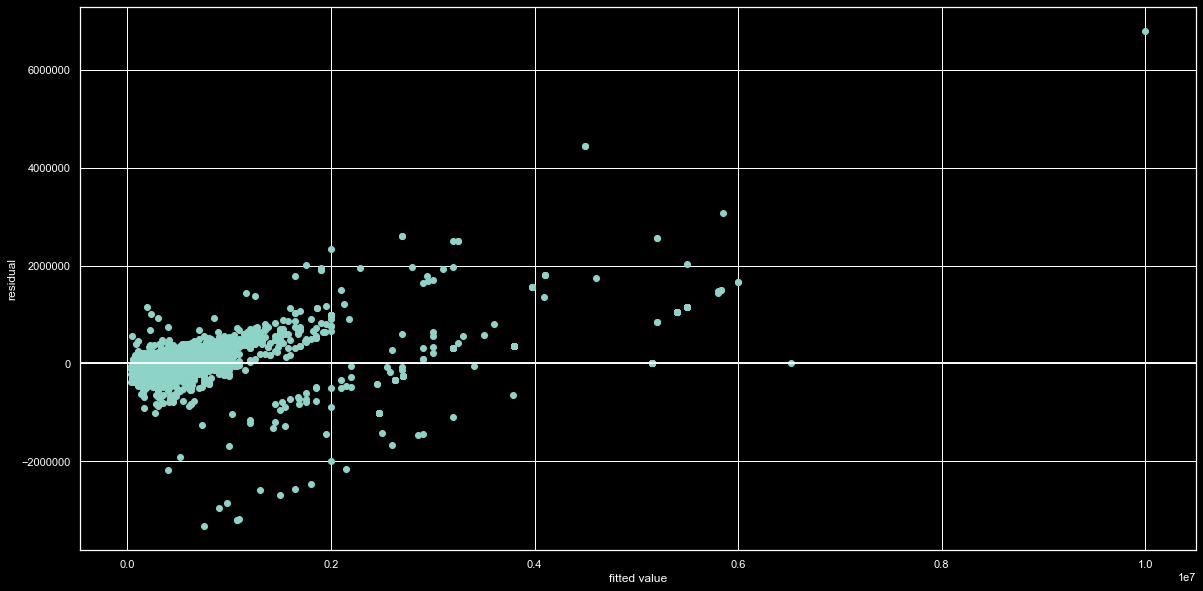

In [41]:
plt.figure(figsize = (20,10))
plt.scatter(y_train,model.resid.values)
plt.axhline(0.05)
plt.axhline(-0.05)
plt.xlabel('fitted value')
plt.ylabel('residual')
plt.show()

((array([-3.5692545 , -3.32983392, -3.19766355, ...,  3.19766355,
          3.32983392,  3.5692545 ]),
  array([-3311789.07562862, -3203394.95859545, -3203394.95859545, ...,
          4438514.23802802,  4438514.23802802,  6782702.43745535])),
 (338853.6356922719, 8040.104697003967, 0.835930909909009))

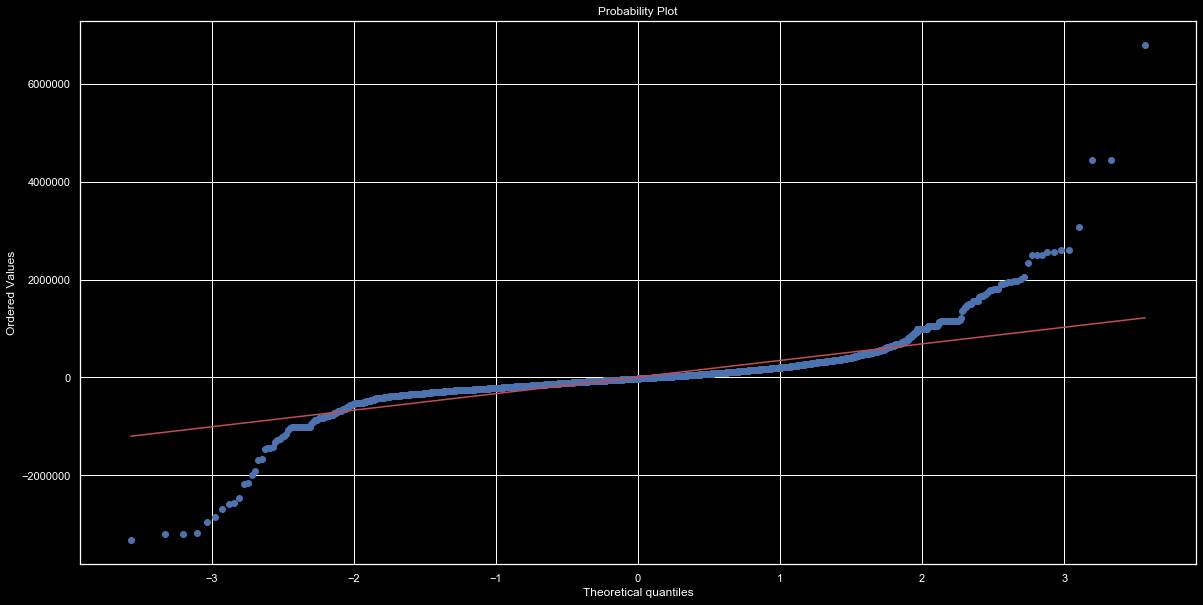

In [42]:
import scipy as sp
fig, ax = plt.subplots(figsize=(20,10))
sp.stats.probplot(model.resid.values, plot=ax, fit=True)

## Validação do Modelo

In [43]:
# Fazendo a predição
predictions = model.predict(X_test[selected_features_BE])

In [44]:
predictions

15      9.049953e+05
3362    4.800795e+05
516     6.183858e+05
4252    3.426195e+05
4690    5.238446e+05
            ...     
2025    3.911406e+06
5425    4.713636e+05
4278    5.776444e+05
1408    5.373741e+05
4620    5.130617e+05
Length: 1660, dtype: float64

In [45]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
model.rsquared

0.8500846510339911

In [47]:
# Criando um DataFrame com o preço e suas prediçoes

df = pd.DataFrame({'selling_price':y_test, 'Resultado':predictions})
df

,selling_price,Resultado
15,570000,9.049953e+05
3362,650000,4.800795e+05
516,775000,6.183858e+05
4252,350000,3.426195e+05
4690,400000,5.238446e+05
...,...,...
2025,480000,3.911406e+06
5425,650000,4.713636e+05
4278,150000,5.776444e+05
1408,550000,5.373741e+05


p.max()O gráfico de dispersão abaixo pontua o valor predito pelo real selling price.

Quanto maior o R^2 do modelo, quanto mais ajustado ao centro tanto os pontos quanto a reta verde se posiciona, o valor predito é mais próximo ao selling_price 

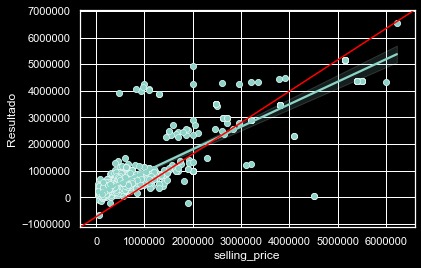

In [48]:
# Plotando o Grafico do preço em relaçao às prediçoes
import matplotlib.lines as mlines

fig, ax = plt.subplots()
sns.regplot(x="selling_price", y="Resultado", data=df);
sns.scatterplot(x='selling_price',y='Resultado', data=df)
line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.show()

In [49]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(df['selling_price'],predictions)

In [50]:
print ("r-squared:", r_value**2)

r-squared: 0.754394916663496


## Transformando o resultado em 

In [61]:
print(X_test.shape)
print(test.shape)
print(test_lr[selected_features_BE].shape)

(1660, 36)
(2374, 12)
(2374, 32)


In [63]:
test_lr[selected_features_BE].head()

,km_driven,max_power,fuel_LPG,fuel_Petrol,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,marca_Ambassador,marca_Audi,...,marca_Maruti,marca_Mercedes-Benz,marca_Mitsubishi,marca_Nissan,marca_Renault,marca_Skoda,marca_Tata,marca_Toyota,marca_Volkswagen,marca_Volvo
0,25000,8180,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,43000,8873,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15000,473,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,60000,1685,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,7032,8876,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
predictions_test = model.predict(test_lr[selected_features_BE])

In [66]:
predictions_test

0       5.260984e+05
1       7.345779e+05
2       3.143474e+05
3       1.059842e+06
4       7.623629e+05
            ...     
2369    2.286516e+05
2370    5.921877e+05
2371    4.886843e+05
2372    3.542525e+05
2373    5.198539e+05
Length: 2374, dtype: float64

In [96]:
df_test = predictions_test.to_frame(name='selling_price')
df_test

,selling_price
0,5.260984e+05
1,7.345779e+05
2,3.143474e+05
3,1.059842e+06
4,7.623629e+05
...,...
2369,2.286516e+05
2370,5.921877e+05
2371,4.886843e+05
2372,3.542525e+05


In [92]:
# id_vector = [i for i in range(1,2375)]
# df_test.index = id_vector
# df_test

(1, 2374)

In [97]:
df_test = df_test.rename_axis('id').reset_index()
df_test

,id,selling_price
0,0,5.260984e+05
1,1,7.345779e+05
2,2,3.143474e+05
3,3,1.059842e+06
4,4,7.623629e+05
...,...,...
2369,2369,2.286516e+05
2370,2370,5.921877e+05
2371,2371,4.886843e+05
2372,2372,3.542525e+05


In [98]:
'''
Primeiro deploy = 21h30 do dia 02/06/2021
'''
# df_test.to_csv('Teste_1-Hugo_Azevedo.csv', index=False)